<a href="https://colab.research.google.com/github/spencerlore/IS4487-Main/blob/main/Labs/lab_05_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Data quality checks: data types, missing values, duplicates and outliers
- Descriptive statistics
- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab uses the same dataset from **Lab 4**. Data on Bay Area Craigslist rental housing posts.

Source: Pennington, Kate (2018). Bay Area Craigslist Rental Housing Posts, 2000-2018. Retrieved from https://github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Import libraries, and the Data, and preview the Data

### Instructions:
- Import the `pandas` library.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `df.shape`, `df.info()` and `df.head()` to inspect the structure and preview the data.

In [1]:
# import any libraries that you wish to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)



In [3]:
df.shape

(200796, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [5]:

df.head(10)

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN
5,pre2013_152345,20060411,2006,alameda,alameda,alameda,825,1.0,NaN,NaN,0,NaN,NaN,NaN,$825 / 1br - Bayview Apartments,NaN,NaN
6,pre2013_27543,20071025,2007,alameda,alameda,alameda,1500,1.0,1.0,NaN,0,NaN,NaN,NaN,$1500 / 1br - 1 Bath-3 Room Apartment - OPEN S...,NaN,NaN
7,6379096957,20171108,2017,alameda,alameda,alameda,2925,3.0,NaN,NaN,0,NaN,NaN,NaN,CUT DOWN ON THOSE MOVE-IN COSTS WITH $500 OFF!!!,NaN,NaN
8,pre2013_6254,20090205,2009,alameda,alameda,alameda,450,NaN,1.0,NaN,0,NaN,NaN,NaN,"$450 Sleeping room, all utilities included, sh...",NaN,NaN
9,pre2013_152262,20060411,2006,alameda,alameda,alameda,1395,2.0,NaN,NaN,0,NaN,NaN,NaN,"$1395 / 2br - Huge Units! Lagoon Complex, Free...",NaN,NaN


## Part 2: Data quality checks -Inspect and Fix issues

### Instructions:
- Check data types (e.g., dates, numeric columns, strings) and fix problems
- Identify duplicates
- Check for outliers in key numeric variables like the target `price`, and others such as `sqft`, `beds`, or `baths`.
- Identify missing values.




### 🔧 Try It Yourself – Part 2.1: Check data types

- Use a command to view the data types
- convert `nhood`, `city` and `county` to categorical type
- convert `date` to datetime type

In [10]:
# write your code here to view datatypes
df.dtypes

# convert strings nhood, city and county to category
df['nhood'] = df['nhood'].astype('category')
df['city'] = df['city'].astype('category')
df['county'] = df['county'].astype('category')

# convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verify
print(df.dtypes)


post_id                object
date           datetime64[ns]
year                    int64
nhood                category
city                 category
county               category
price                   int64
beds                  float64
baths                 float64
sqft                  float64
room_in_apt             int64
address                object
lat                   float64
lon                   float64
title                  object
descr                  object
details                object
dtype: object


### 🔧 Try It Yourself – Part 2.2: Check duplicates

In [11]:
# write your code here to count exact duplicates
df.duplicated().sum()

np.int64(0)

### 🔧 Try It Yourself – Part 2.3: Check outlier in price and remove them using the IQR rule that we have learned (keep if within Q1 - 1.5\*IQR and Q3+ 1.5\*IQR)

- remove/drop outliers
- view the size of the new Dataframe, and assess how many rows have been removed. Is this acceptable


In [12]:
# write code here to remove price outliers
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

In [13]:
#check the size of the new Dataframe with no price outliers
df.shape

(197021, 17)

🔧 Is this acceptable? write a comment here

Yes. After running df.shape we can see that the size of the dataframe has shunk by a marginal amount due to the decrease in outliers.

### 🔧 Try It Yourself – Part 2.4: Check missing values

You will see that our main target variable price has no missing values. That is good news. We wont need to do anything else here

However most models will drop rows that have any missing values. Some columns have many missing We will see in the next lab how to optimally deal with missing values.

In [14]:
# Check for missing values
print(df.isnull().sum())

post_id             0
date                0
year                0
nhood               0
city                0
county           1346
price               0
beds             6228
baths          155049
sqft           133433
room_in_apt         0
address        193210
lat            189597
lon            192825
title            2446
descr          193856
details        189248
dtype: int64


## Part 3: Basic Exploration using Descriptive statistics




In [15]:
# Basic summary statistics for key numeric variables
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,197021.000000,190793.000000,41972.000000,63588.000000
mean,2067.667848,1.876112,1.663943,1174.754576
std,1092.775166,1.058409,0.665596,5033.363160
min,650.000000,0.000000,1.000000,80.000000
25%,1299.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2500.000000,2.000000,2.000000,1340.000000
max,7500.000000,12.000000,6.500000,900000.000000


Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.

In [16]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

/tmp/ipython-input-2269547214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)


,price
nhood,
inverness,5310.000000
tiburon / belvedere,3470.911197
SOMA / south beach,3450.726223
financial district,3431.484935
saratoga,3393.803279
west portal / forest hills,3302.753388
NOPA,3186.456667
pacific heights,3022.314860
candlestick point,3011.316239


In [17]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,54264
san jose,13564
oakland,9308
santa rosa,6163
santa cruz,5407
san mateo,5094
sunnyvale,4480
mountain view,4382
santa clara,4132


## Part 4: Visualization using Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


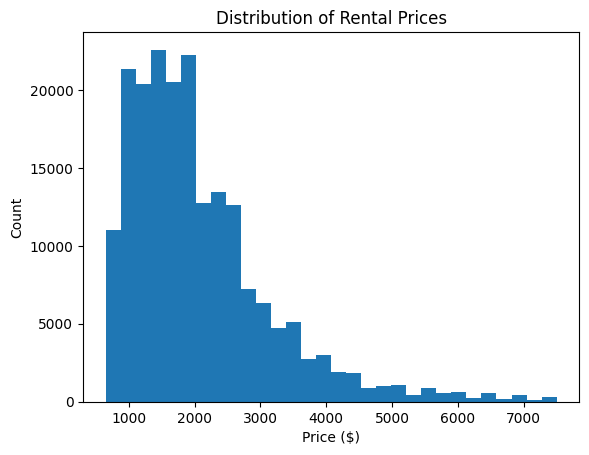

In [18]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

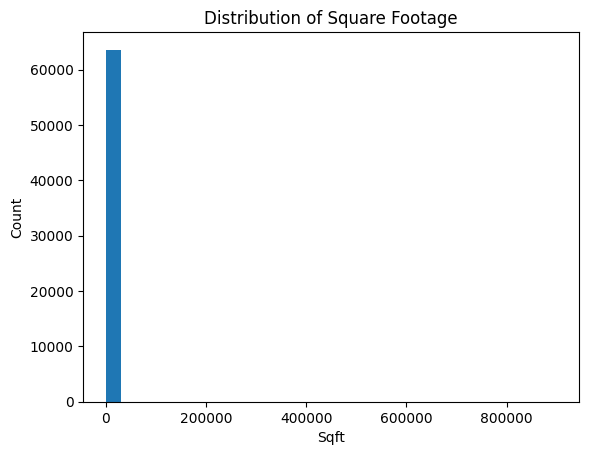

In [19]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


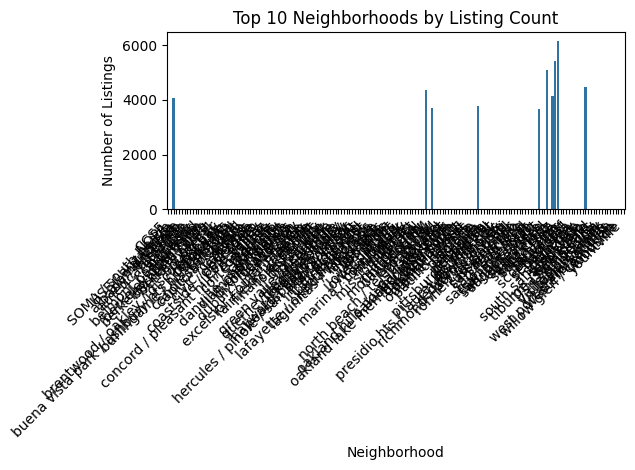

In [20]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

sns.barplot(x=top_nhoods.index, y=top_nhoods.values)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

2. After creating the visuals, write 1–2 sentences explaining what you notice in each.


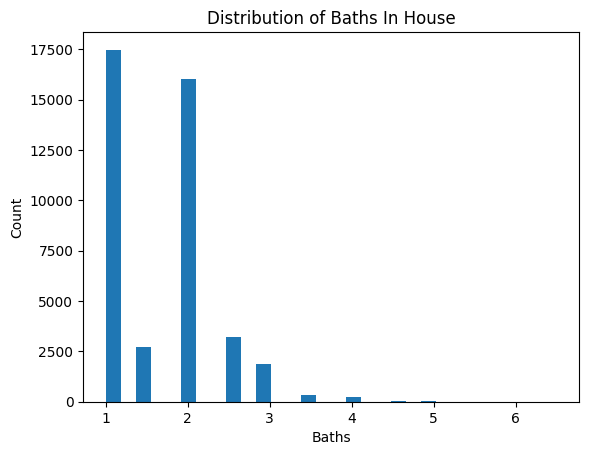

In [21]:
# Visual 1 🔧
# Histogram: Baths
plt.hist(df['baths'], bins=30)
plt.title("Distribution of Baths In House")
plt.xlabel("Baths")
plt.ylabel("Count")
plt.show()


🔧 Visual 1 comment:

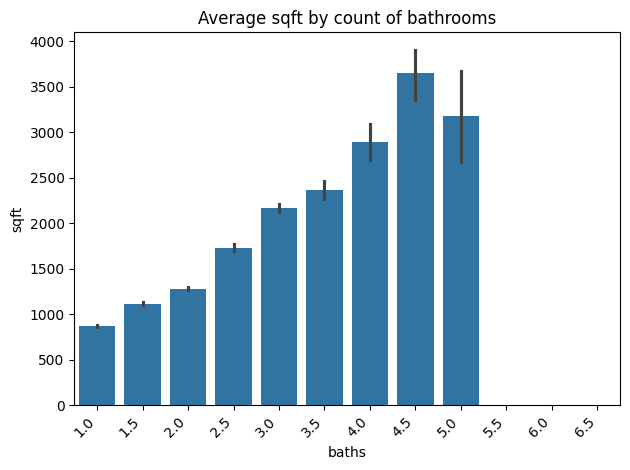

In [25]:
# Visual 2 🔧
# Average square footage by number of bathrooms
sns.barplot(data=df, x='baths', y='sqft')
plt.title("Average sqft by count of bathrooms")
plt.xlabel("baths")
plt.ylabel("sqft")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🔧 Visual 2 comment:

The graph above displays baths on the x axis and square footage on the y axis. We can clearly see that as the number of square footage increases, so does the number of baths. We also observe that the hightest number of baths is observed to be around the 3500 square footage mark with a value of 4.5 baths per house on average.

## Part 5: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [26]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.453705,0.401660,0.053968
beds,0.453705,1.000000,0.643754,0.703357
baths,0.401660,0.643754,1.000000,0.629468
sqft,0.053968,0.703357,0.629468,1.000000


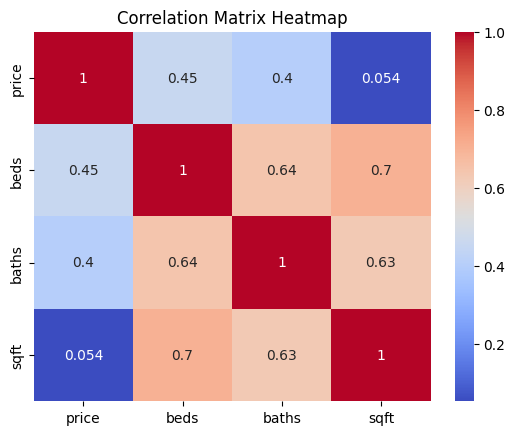

In [27]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

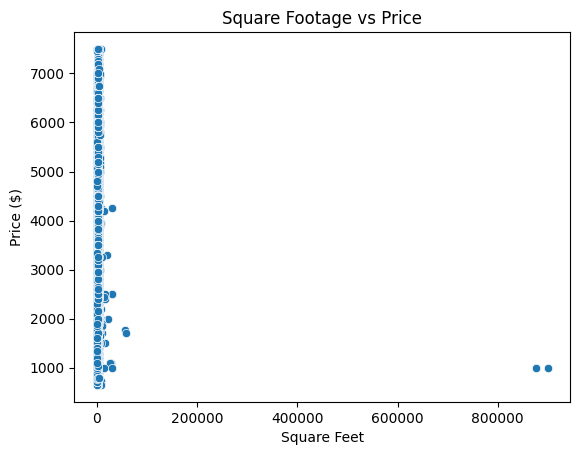

In [28]:
# Scatterplot: Square Footage vs Price
sns.scatterplot(x='sqft', y='price', data=df)
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

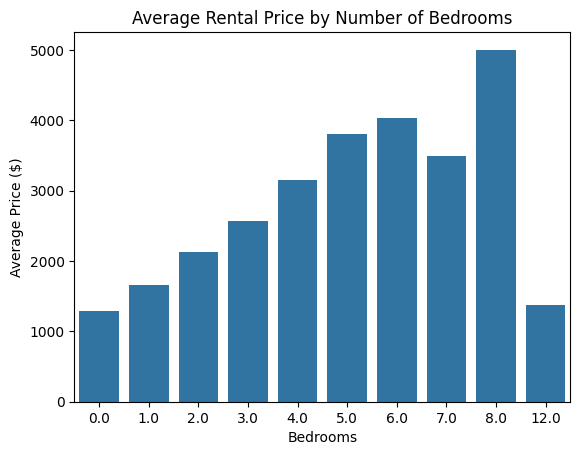

In [29]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.
3. What trends or outliers do you see?

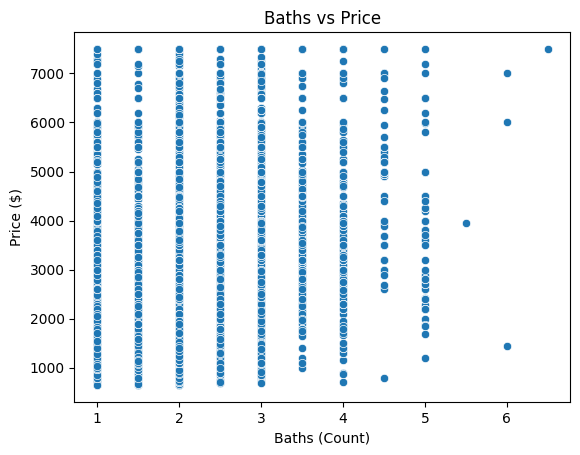

In [30]:
#1 🔧
# Scatterplot: Baths vs Price
sns.scatterplot(x='baths', y='price', data=df)
plt.title("Baths vs Price")
plt.xlabel("Baths (Count)")
plt.ylabel("Price ($)")
plt.show()

    year        price
0   2000  1510.952381
1   2001  2009.739310
2   2002  1669.556738
3   2003  1573.383743
4   2004  1642.277840
5   2005  1506.983871
6   2006  1764.345831
7   2007  2033.602596
8   2008  2010.951895
9   2009  1882.756691
10  2010  1795.600296
11  2011  2021.713915
12  2012  2056.291743
13  2013  2492.213802
14  2014  2656.825700
15  2015  2844.753398
16  2016  2795.165914
17  2017  2884.878224
18  2018  2860.209527


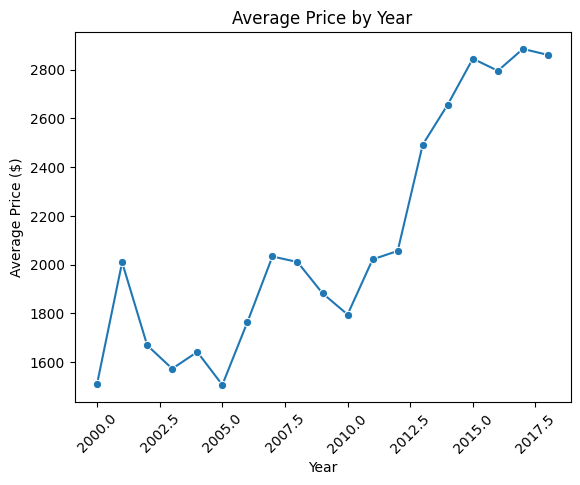

In [39]:
#2 🔧
# Group by year. Calculate avg price.
avg_price_by_year = df.groupby('year')['price'].mean().reset_index()
print(avg_price_by_year)

# Plot the data.
sns.lineplot(data=avg_price_by_year, x='year', y='price', marker='o')
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()


🔧 Add comment here:
After grouping by year and calculating average price over time we can see that, expectedly, the average price of a house has sporatically trended upward from year 2000 to year 2017.

## 🔧  Part 6: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

🔧 Add refections here:
1. From the correlation matrix above, the variables, from order of most correlated to least correlated are beds, baths, and square footage. The correlation values are 0.4537, 0.4017, and 0.0540 respectively.

2. The chart titled "Average price by number of bedrooms" shows us that the price of a rental increases based on the number of bathrooms it has. Likewise, the number of baths a rental has will increase the rental price based on the two graphs above.

3. The highest prices occur from the years 2015 to 2017. These years have an average price of roughly 2800.

4. Other visualization and groupings that could further the depth of the analysis would be an analysis of price vs country and a grouping by country to adjust for different valuings of currency. A visualization between the number of rooms and square footage, to observe whether one or the other is actually correlatory or if a higher number of square feet natrually cooccurs with a high number of bathrooms. This analysis could reframe decisions based soley around bathrooms concerning price.

In [40]:
!jupyter nbconvert --to html "lab_05_LoreSpencer.ipynb"

[NbConvertApp] Converting notebook lab_05_LoreSpencer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 862371 bytes to lab_05_LoreSpencer.html
